In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
#import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [126]:
#load the data
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df2=pd.read_csv('fraudTrain.csv')

In [51]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0


In [113]:
df2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [127]:
df.drop(['type', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)


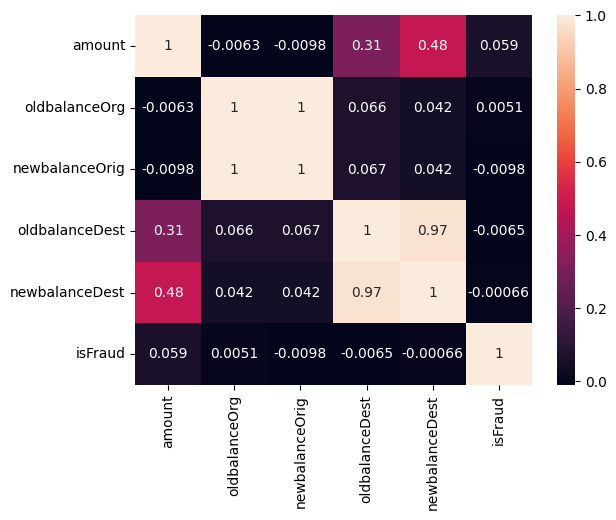

In [121]:
#visualize the data
# df_new.hist(figsize=(20,20))
#plot the correlation matrix
corr = df_new.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [59]:
scaler=StandardScaler()


In [128]:
# Apply standard scaling to the entire dataset except the 'fraud' column
df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] = scaler.fit_transform(df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])
# scaled_data = scaler.fit_transform(df)
#drop step
df.drop(['step'], axis=1, inplace=True)

In [129]:
#Take 50% 
df_new= df.sample(frac=0.5, random_state=1)
# df_new.count()
# df.count()

In [143]:
from sklearn.svm import SVC
#import desicion tree classifier
#import random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf

input_dim = 5 # Replace 10 with the actual input dimension

from tensorflow import keras

# Split the dataset into features (X) and target variable (y)
X = df_new.drop(columns=['isFraud'])
y = df_new['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)







In [145]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model



In [146]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [147]:
model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
79533/79533 [==============================] - 182s 2ms/step - loss: 0.0050 - accuracy: 0.9992
Epoch 2/10
10886/79533 [===>..........................] - ETA: 2:01 - loss: 0.0041 - accuracy: 0.9993

: 

In [131]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6322570,-0.258844,-0.285926,-0.281629,-0.273946,-0.293687
3621196,-0.287527,-0.288716,-0.292442,-0.323814,-0.333411
1226256,-0.241580,-0.282226,-0.292442,-0.323814,-0.333411
2803274,0.137689,-0.281767,-0.292442,-0.209006,-0.155611
3201247,-0.046117,-0.281527,-0.292442,-0.249467,-0.223254
...,...,...,...,...,...
3812468,-0.290785,-0.288538,-0.292442,-0.323814,-0.333411
4143395,0.376702,-0.284875,-0.149342,-0.323814,-0.333411
4291086,0.069745,-0.278622,-0.206556,-0.125950,-0.210771
1798734,-0.177768,-0.276280,-0.292442,-0.323814,-0.313675


In [132]:
y

6322570    0
3621196    0
1226256    0
2803274    0
3201247    0
          ..
3812468    0
4143395    0
4291086    0
1798734    0
3625932    0
Name: isFraud, Length: 3181310, dtype: int64

In [133]:
model=DecisionTreeClassifier()


In [134]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

c:\Users\BASIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\BASIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\BASIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='is_fraud', ylabel='count'>

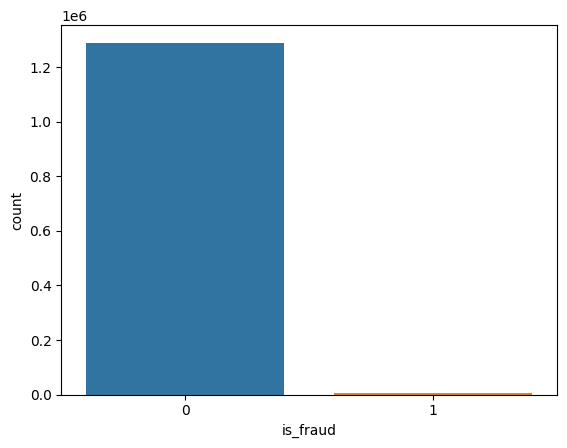

In [114]:
sns.countplot(x='is_fraud',data=df2)

In [135]:
#predict the model
y_pred = model.predict(X_test)


In [74]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print("confusion matrix:", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy)
print("Precision:", precision)

confusion matrix: [[635355    104]
 [   153    650]]
Accuracy: 0.9995960783450842
Precision: 0.8620689655172413


c:\Users\BASIM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)